In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [3]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [4]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
X= data.drop('TARGET', axis=1)
Y = data['TARGET']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
constant_filter = VarianceThreshold(0.01)
constant_filter.fit(x_train)
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [8]:
x_train_filter.shape, x_test_filter.shape

((60816, 267), (15204, 267))

In [9]:
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T

In [10]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [11]:
duplicated_features = x_train_T.duplicated()

In [12]:
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
262    False
263    False
264    False
265    False
266    False
Length: 267, dtype: bool

In [13]:
features_to_keep = [not index for index in duplicated_features]

In [15]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [17]:
x_train_unique.shape, x_test_unique.shape, x_train.shape, x_test.shape

((60816, 251), (15204, 251), (60816, 370), (15204, 370))

**Calculate the ROC_AUC score**

In [18]:
roc_auc = []
for feature in x_train_unique.columns:
  clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  clf.fit(x_train_unique[feature].to_frame(), y_train)
  y_pred = clf.predict(x_test_unique[feature].to_frame())
  roc_auc.append(roc_auc_score(y_test, y_pred))

In [19]:
print(roc_auc)

[0.5037916595398262, 0.5, 0.5, 0.5006856922633907, 0.49920940786240253, 0.4974605353466026, 0.4998627316403569, 0.49993136582017844, 0.49996568291008925, 0.4998970487302677, 0.4998627316403569, 0.5000323684854363, 0.4973232669869595, 0.4998970487302677, 0.5011997990772276, 0.5026042016242701, 0.4998970487302677, 0.5011654819873168, 0.5019185093608793, 0.4998627316403569, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49993136582017844, 0.5, 0.5, 0.5, 0.49996568291008925, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4998627316403569, 0.500547124834098, 0.5, 0.5026055006939196, 0.4997597803706246, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4997940974605353, 0.49938229238160603, 0.4993479752916953, 0.4994146608670424,

In [20]:
roc_values = pd.Series(roc_auc)
roc_values.index = x_train_unique.columns
roc_values.sort_values(ascending=False,inplace=True)

In [21]:
roc_values

266    0.507291
0      0.503792
109    0.502606
15     0.502604
18     0.501919
         ...   
230    0.498935
128    0.498627
227    0.498009
5      0.497461
12     0.497323
Length: 251, dtype: float64

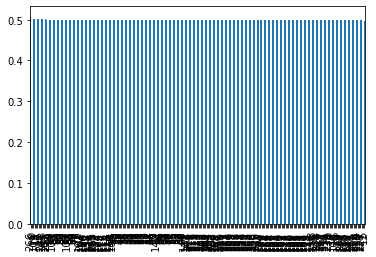

In [22]:
# All the features which has roc_auc value less than 0.5 mean they are random predictions. Hence all features less than or equal to 0.5 can be removed.
roc_values.plot.bar()

In [23]:
sel = roc_values[roc_values>0.5]

In [24]:
sel

266    0.507291
0      0.503792
109    0.502606
15     0.502604
18     0.501919
14     0.501200
17     0.501165
234    0.501165
164    0.500686
3      0.500686
194    0.500617
107    0.500547
233    0.500068
11     0.500032
dtype: float64

In [25]:
x_train_roc = x_train_unique[sel.index]
x_test_roc = x_test_unique[sel.index]

In [26]:
def run_random_forest(x_train, x_test, y_train, y_test):
  clf = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('Accuracy on test data: ', accuracy_score(y_test, y_pred))

In [28]:
%%time
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test data:  0.9570507761115495
CPU times: user 34 s, sys: 167 ms, total: 34.2 s
Wall time: 17.7 s


In [29]:
%%time
run_random_forest(x_train_roc, x_test_roc, y_train, y_test)

Accuracy on test data:  0.9531702183635885
CPU times: user 17.2 s, sys: 54.8 ms, total: 17.2 s
Wall time: 8.98 s


**Feature selection using RMSE in regression**

In [33]:
boston = load_boston()

In [34]:
X = pd.DataFrame(data= boston.data, columns=boston.feature_names)

In [35]:
Y = boston.target

In [36]:
X.shape, Y.shape

((506, 13), (506,))

In [37]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [40]:
mse = []
for feature in x_train.columns:
  reg = LinearRegression()
  reg.fit(x_train[feature].to_frame(), y_train)
  y_pred = reg.predict(x_test[feature].to_frame())
  mse.append(mean_squared_error(y_test, y_pred))

In [41]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.90735162739531,
 80.3915476111525,
 82.61874125667717,
 82.46499985731933,
 78.30831374720844,
 81.79497121208001,
 77.75285601192718,
 46.336305360025925]

In [42]:
mse = pd.Series(mse)
mse.index = x_train.columns
mse.sort_values(ascending=False, inplace=True)

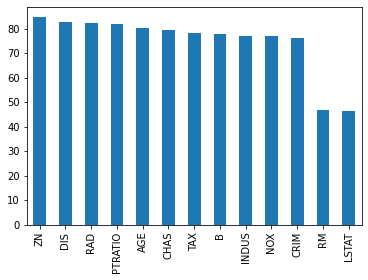

In [44]:
mse.plot.bar() # Higher MSE means higher error. Low MSE features are very important. Hence select only the last two features

In [45]:
x_train_2 = x_train[['RM', 'LSTAT']]
x_test_2 = x_test[['RM', 'LSTAT']]

In [47]:
%%time
model = LinearRegression()
model.fit(x_train_2, y_train)
y_pred = model.predict(x_test_2)
print('r2_score: ', r2_score(y_test, y_pred))
print('rmse_score: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('standard deviation of house price: ', np.std(Y))

r2_score:  0.5409084827186418
rmse_score:  6.114172522817781
standard deviation of house price:  9.188011545278203
CPU times: user 3.86 ms, sys: 1.96 ms, total: 5.82 ms
Wall time: 9.88 ms


In [48]:
%%time
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('r2_score: ', r2_score(y_test, y_pred))
print('rmse_score: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('standard deviation of house price: ', np.std(Y))

r2_score:  0.5892223849182512
rmse_score:  5.783509315085133
standard deviation of house price:  9.188011545278203
CPU times: user 8.26 ms, sys: 3 µs, total: 8.26 ms
Wall time: 10.7 ms
